In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. load data and quick overview

In [2]:
training_data = pd.read_csv("training_loan_data.csv", 
                            skiprows=1,
                            dtype={'id': 'Int64', 'member_id': 'Int64', 
                                   'inq_last_6mths': 'Int64', 'mths_since_last_major_derog': 'Int64',
                                   'mths_since_recent_inq': 'Int64',
                                   'bad_flag':'Int64'
                                  })

In [3]:
training_data.head()

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,...,0,17,72%,4000.0,<NA>,3828.953801,5759.0,1,99,0
1,10000002,12002921,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0,8,61.20%,35700.0,<NA>,34359.940730,114834.0,1,353,0
2,10000003,11983096,12000,36 months,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1,3,24%,18100.0,<NA>,16416.617760,7137.0,1,157,0
3,10000004,12003142,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,...,1,3,54.60%,42200.0,<NA>,38014.149760,799592.0,1,365,0
4,10000005,11993233,12000,36 months,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,...,0,17,68.80%,7000.0,53,6471.462236,13605.0,1,157,0


In [4]:
training_data.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'emp_length',
       'home_ownership', 'annual_inc', 'desc', 'purpose', 'percent_bc_gt_75',
       'bc_util', 'dti', 'inq_last_6mths', 'mths_since_recent_inq',
       'revol_util', 'total_bc_limit', 'mths_since_last_major_derog',
       'tot_hi_cred_lim', 'tot_cur_bal', 'application_approved_flag',
       'internal_score', 'bad_flag'],
      dtype='object')

In [5]:
training_data.shape

(199121, 23)

In [6]:
training_data.describe()

,id,member_id,loan_amnt,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
count,199121.0,189457.0,199121.000000,1.894570e+05,180419.000000,180333.000000,189457.000000,189457.0,161472.0,181962.000000,32749.0,181962.000000,1.617160e+05,199121.0,199121.000000,189457.0
mean,10098566.911205,5929625.920367,14071.947334,7.224330e+04,53.575807,66.840867,17.061084,0.803549,6.993634,20239.424699,41.780054,20238.384308,1.373215e+05,1.0,183.967954,0.069293
std,57043.972099,3339821.824345,8067.076636,5.180483e+04,34.153946,26.111490,7.596941,1.032936,5.879707,18879.795379,20.984599,18941.591779,1.507358e+05,0.0,104.858324,0.253952
min,10000001.0,151536.0,1000.000000,4.800000e+03,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,1.0,14.000000,0.0
25%,10049582.0,2308792.0,8000.000000,4.500000e+04,25.000000,49.500000,11.340000,0.0,2.0,7800.000000,25.0,7834.720066,2.746575e+04,1.0,105.000000,0.0
50%,10098227.0,6060627.0,12000.000000,6.200000e+04,50.000000,72.200000,16.780000,0.0,6.0,14700.000000,41.0,14637.479485,8.076050e+04,1.0,157.000000,0.0
75%,10148007.0,8727745.0,19600.000000,8.700000e+04,80.000000,89.000000,22.580000,1.0,11.0,26500.000000,58.0,26397.825272,2.082122e+05,1.0,256.000000,0.0
max,10197787.0,12098992.0,35000.000000,7.141778e+06,100.000000,339.600000,34.990000,8.0,24.0,522210.000000,165.0,520643.298200,8.000078e+06,1.0,456.000000,1.0


pct of data is missing

In [7]:
training_data.isna().sum()/training_data.shape[0] * 100

id                              0.000000
member_id                       4.853330
loan_amnt                       0.000000
term                            4.853330
int_rate                        4.853330
emp_length                      8.833825
home_ownership                  4.853330
annual_inc                      4.853330
desc                           58.817001
purpose                         4.853330
percent_bc_gt_75                9.392279
bc_util                         9.435469
dti                             4.853330
inq_last_6mths                  4.853330
mths_since_recent_inq          18.907599
revol_util                      4.917111
total_bc_limit                  8.617373
mths_since_last_major_derog    83.553216
tot_hi_cred_lim                 8.617373
tot_cur_bal                    18.785060
application_approved_flag       0.000000
internal_score                  0.000000
bad_flag                        4.853330
dtype: float64

Some columns has missing value of 5% to 10%, which are reasonably accepted. \
desc has 58% rate of missing, but this is not so important at our first free vision of the model   \
mths_since_last_major_derog, tot_cur_bal, mths_since_recent_inq has higher missing rate, we may need look into details.

## 2. EDA, looking into features one by one

### 2.1 for member id, let see the distribution of number of application for each person

In [8]:
# plot_df = training_data.groupby('member_id').count()[['id']]
# ax = plot_df.plot.hist(bins=12, alpha=1)
temp_df = training_data.groupby('member_id', dropna=False).count()[['id']].reset_index().groupby('id').count()
temp_df.index.names = ['number of applications']
temp_df

,member_id
number of applications,
1,186789
2,1334
9664,0


large majority of people apply only one for thoses loans member id is not missing(95%)

### 2.2 for loan_amnt, let see the distribution of number of application for each person

In [9]:
training_data['loan_amnt'].describe()

count    199121.000000
mean      14071.947334
std        8067.076636
min        1000.000000
25%        8000.000000
50%       12000.000000
75%       19600.000000
max       35000.000000
Name: loan_amnt, dtype: float64

<Axes: >

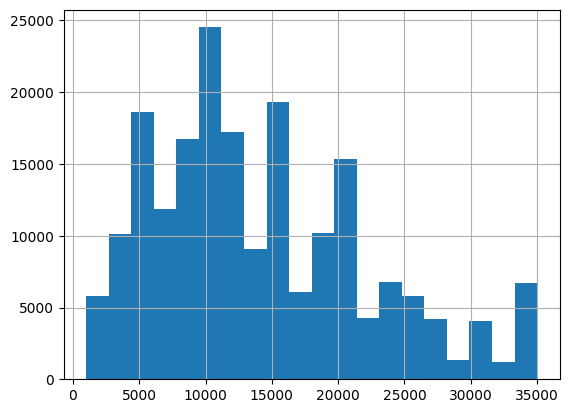

In [10]:
training_data['loan_amnt'].hist(bins=20)

loan amnt has right tail distribution with average around 14000

### 2.3 term

In [11]:
training_data['term'].unique()

array([' 36 months', ' 60 months', nan], dtype=object)

In [12]:
training_data.groupby(['term'], dropna=False).count()[['id']] / training_data.shape[0] * 100

,id
term,
36 months,72.719603
60 months,22.427067
NaN,4.85333


Break down by percentage, we could see most loans has 36 months term, this would later transformed to Indicator

### 2.4 int_rate

In [13]:
# data cleaning
training_data['int_rate'] = training_data['int_rate'].apply(lambda x:float(x[:-1]) if type(x) == str else np.NaN)

In [14]:
training_data['int_rate'].describe()

count    189457.000000
mean         14.282718
std           4.438100
min           6.000000
25%          11.140000
50%          14.090000
75%          17.270000
max          26.060000
Name: int_rate, dtype: float64

<Axes: >

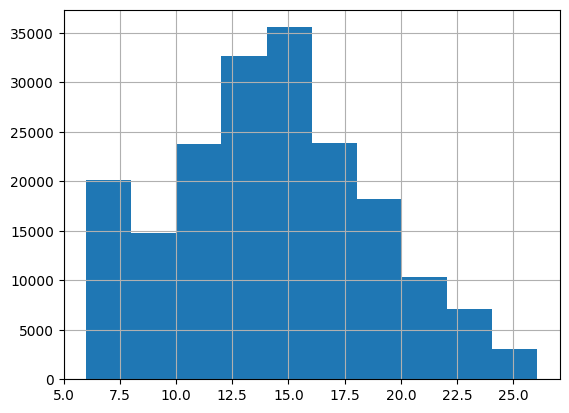

In [15]:
training_data['int_rate'].hist()

This would be the distribution of int rate for 95% of loans.

For simplicity, we will just fill NA using mean value for now for Neural Network model.

### 2.5 emp_length

In [16]:
training_data['emp_length'].unique()

array(['3 years', '10+ years', '4 years', '5 years', '2 years', '7 years',
       '6 years', '1 year', '9 years', '< 1 year', '8 years', nan],
      dtype=object)

In [17]:
emp_length_map = {
    '< 1 year':0,
    '1 year':1,
    '2 years':2,
    '3 years':3,
    '4 years':4,
    '5 years':5,
    '6 years':6,
    '7 years':7,
    '8 years':8,
    '9 years':9,
    '10+ years':10,
}

In [18]:
# make data transformation to interger for each category
# data cleaning
training_data['emp_length'] = training_data['emp_length'].apply(lambda x: emp_length_map[x] if type(x)==str else np.NaN)

In [19]:
temp_dist = training_data.groupby(['emp_length'], dropna=False).count()['id']
temp_dist

emp_length
0.0     13312
1.0     11504
2.0     16257
3.0     14058
4.0     10905
5.0     14361
6.0     11981
7.0     11287
8.0      9040
9.0      7178
10.0    61648
NaN     17590
Name: id, dtype: Int64

<BarContainer object of 12 artists>

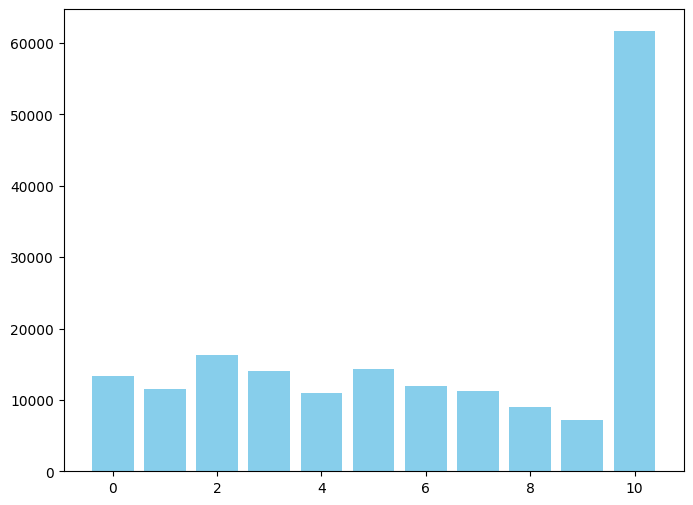

In [20]:
plt.figure(figsize=(8, 6))
plt.bar(temp_dist.index, temp_dist.values, color='skyblue')

### 2.6 home_ownership

In [21]:
training_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'NONE', 'OTHER', nan], dtype=object)

In [22]:
temp_dist = training_data.groupby(['home_ownership'], dropna=False).count()['id']
temp_dist.index = list(temp_dist.index[:-1]) + ['Missing']
temp_dist

MORTGAGE    97647
NONE           42
OTHER          46
OWN         15573
RENT        76149
Missing      9664
Name: id, dtype: Int64

<BarContainer object of 6 artists>

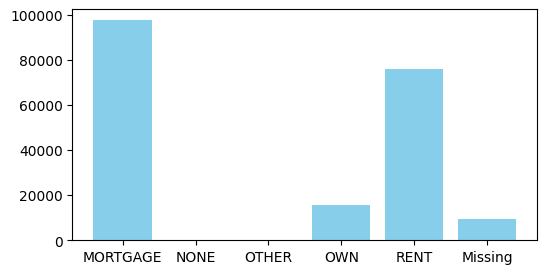

In [23]:
plt.figure(figsize=(6, 3))
plt.bar(temp_dist.index, temp_dist.values, color='skyblue')

Mortgage and rent are most common type.

### 2.7 annual_inc

In [24]:
training_data['annual_inc'].describe()

count    1.894570e+05
mean     7.224330e+04
std      5.180483e+04
min      4.800000e+03
25%      4.500000e+04
50%      6.200000e+04
75%      8.700000e+04
max      7.141778e+06
Name: annual_inc, dtype: float64

<Axes: >

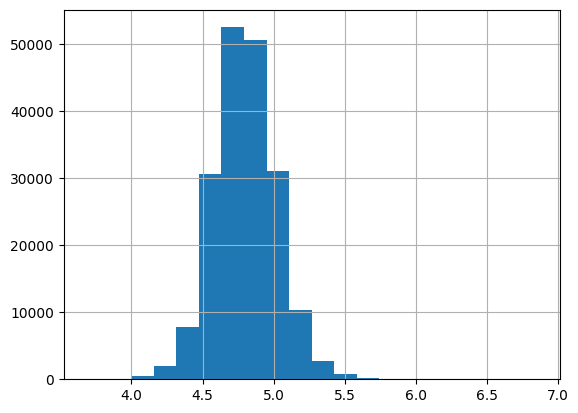

In [25]:
np.log10(training_data['annual_inc']).hist(bins=20)

After log transforming, the distribution is approximate normal, we will use log annual_inc as feature in our model

### 2.8 desc

In [26]:
training_data['desc'].iloc[8]

'  Borrower added on 12/31/13 > My goal is to purchase a home. I am consolidating my debt to lower interest rate to pay off debt faster. My goal is targeted for February 2015.<br>'

In [27]:
training_data['desc'].iloc[30322]

'  Borrower added on 10/21/13 > Three years ago there was a forest fire in the mountains above our house, and then the community flooded. Got in debt fixing our house and landscape which was an unexpected expense. Want to get out of debt and start saving money again. Thank you.<br>'

The desc provides the reason for taking loans, we will skip this in model for now. But we could review if particular loan is of interest.

### 2.9 purpose

In [28]:
training_data['purpose'].unique()

array(['debt_consolidation', 'home_improvement', 'credit_card', 'other',
       'major_purchase', 'small_business', 'house', 'moving', 'medical',
       'car', 'vacation', 'renewable_energy', 'wedding', nan],
      dtype=object)

In [29]:
temp_dist = training_data.groupby(['purpose'], dropna=False).count()['id']
temp_dist.index = list(temp_dist.index[:-1]) + ['Missing']
temp_dist

car                     1962
credit_card            43431
debt_consolidation    112259
home_improvement       10362
house                   1099
major_purchase          3681
medical                 1524
moving                  1050
other                   8947
renewable_energy         122
small_business          2758
vacation                 915
wedding                 1347
Missing                 9664
Name: id, dtype: Int64

<BarContainer object of 14 artists>

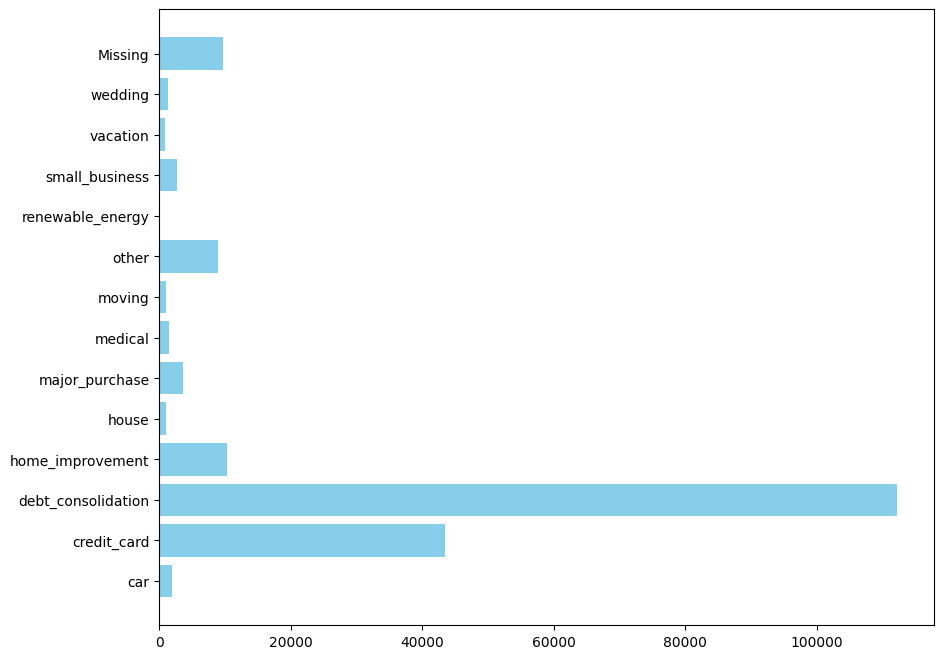

In [30]:
plt.figure(figsize=(10, 8))
plt.barh(temp_dist.index, temp_dist.values, color='skyblue')

Most loans are used for debt consolidation and credit card

### 2.10 percent_bc_gt_75

<Axes: >

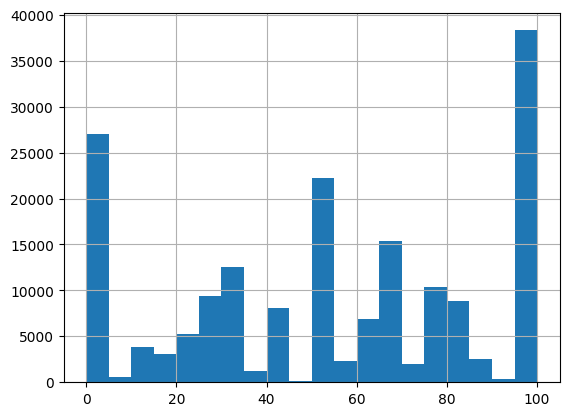

In [31]:
training_data['percent_bc_gt_75'].hist(bins=20)

data are a bit polarized with 0% and 100% among highest

### 2.11 bc_util

In [32]:
training_data['bc_util'].describe()

count    180333.000000
mean         66.840867
std          26.111490
min           0.000000
25%          49.500000
50%          72.200000
75%          89.000000
max         339.600000
Name: bc_util, dtype: float64

<Axes: >

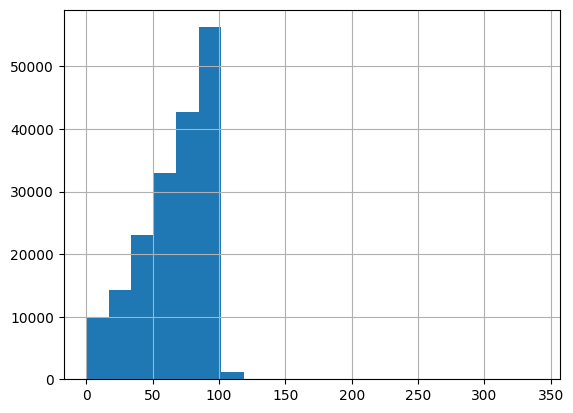

In [33]:
training_data['bc_util'].hist(bins=20)

Some of them are even higher than 100%, need to double check(possible data error) and look into those cases

### 2.12 dti

In [34]:
training_data['dti'].describe()

count    189457.000000
mean         17.061084
std           7.596941
min           0.000000
25%          11.340000
50%          16.780000
75%          22.580000
max          34.990000
Name: dti, dtype: float64

<Axes: >

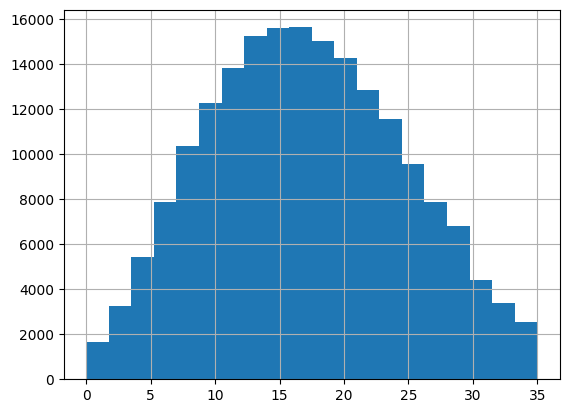

In [35]:
training_data['dti'].hist(bins=20)

Maximum is around 35%

### 2.13 inq_last_6mths

In [36]:
training_data['inq_last_6mths'].describe()

count    189457.0
mean     0.803549
std      1.032936
min           0.0
25%           0.0
50%           0.0
75%           1.0
max           8.0
Name: inq_last_6mths, dtype: Float64

In [37]:
temp_dist = training_data.groupby(['inq_last_6mths'], dropna=False).count()['id']
temp_dist.index = [str(i) for i in range(9)] + ['Missing']
temp_dist

0          96518
1          53454
2          24708
3          11277
4           2359
5            772
6            349
7             13
8              7
Missing     9664
Name: id, dtype: Int64

<BarContainer object of 10 artists>

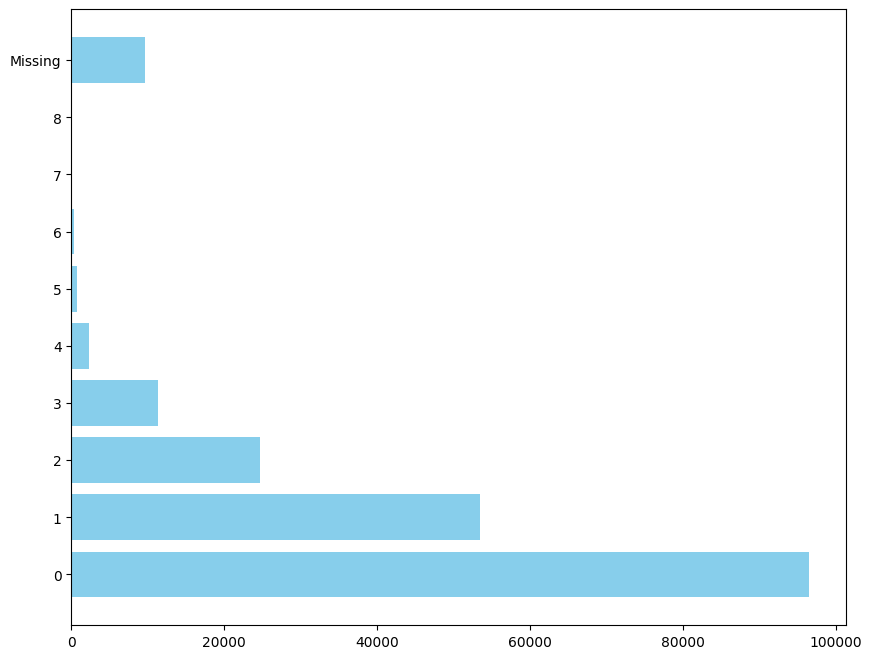

In [38]:
plt.figure(figsize=(10, 8))
plt.barh(temp_dist.index, temp_dist.values, color='skyblue')

The number of inquiries are generally stacked over lower end.

### 2.14 mths_since_recent_inq

In [39]:
training_data['mths_since_recent_inq'].describe()

count    161472.0
mean     6.993634
std      5.879707
min           0.0
25%           2.0
50%           6.0
75%          11.0
max          24.0
Name: mths_since_recent_inq, dtype: Float64

In [40]:
temp_dist = training_data.groupby(['mths_since_recent_inq'], dropna=False).count()['id']
temp_dist.index = [str(i) for i in range(25)] + ['Missing']
temp_dist

0          14185
1          17440
2          14002
3          12374
4          11316
5          10409
6           9386
7           9289
8           8298
9           7617
10          6527
11          5901
12          5380
13          4641
14          4135
15          3401
16          2914
17          2616
18          2316
19          2102
20          1842
21          1684
22          1520
23          1468
24           709
Missing    37649
Name: id, dtype: Int64

<BarContainer object of 26 artists>

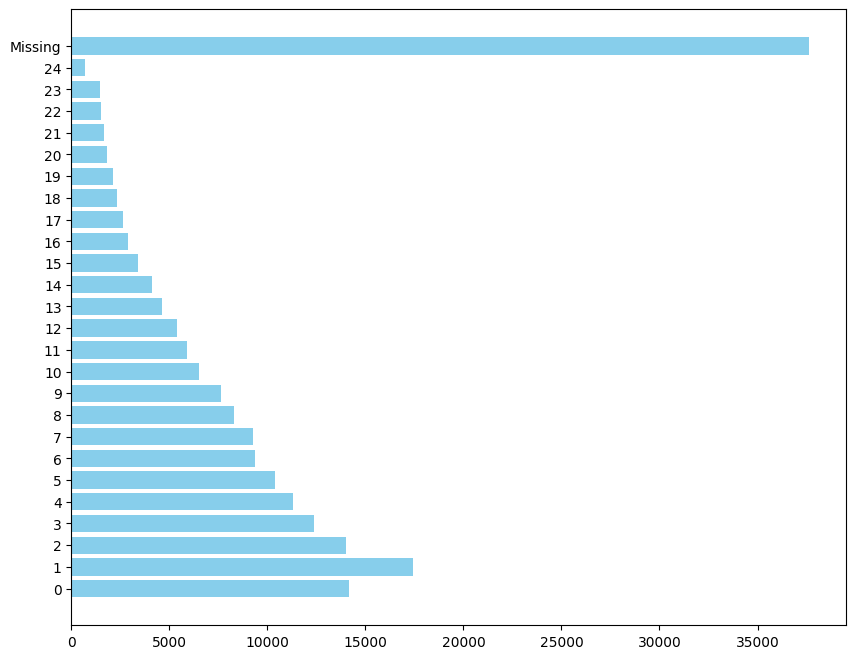

In [41]:
plt.figure(figsize=(10, 8))
plt.barh(temp_dist.index, temp_dist.values, color='skyblue')

For non-missing data, we could see they would inq more clost to now.

### 2.15 revol_util

In [42]:
training_data['revol_util'].head()

0       72%
1    61.20%
2       24%
3    54.60%
4    68.80%
Name: revol_util, dtype: object

In [43]:
# data cleaning
training_data['revol_util'] = training_data['revol_util'].apply(lambda x:float(x[:-1]) if type(x) == str else np.NaN)

In [44]:
training_data['revol_util'].describe()

count    189330.000000
mean         58.390322
std          23.007160
min           0.000000
25%          42.500000
50%          60.500000
75%          76.600000
max         140.400000
Name: revol_util, dtype: float64

<Axes: >

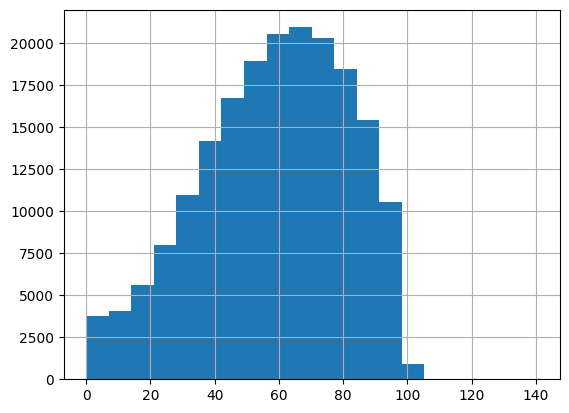

In [45]:
training_data['revol_util'].hist(bins = 20)

### 2.16 total_bc_limit

In [46]:
training_data['total_bc_limit'].describe()

count    181962.000000
mean      20239.424699
std       18879.795379
min           0.000000
25%        7800.000000
50%       14700.000000
75%       26500.000000
max      522210.000000
Name: total_bc_limit, dtype: float64

plot log distribution

array([[<Axes: title={'center': 'total_bc_limit'}>]], dtype=object)

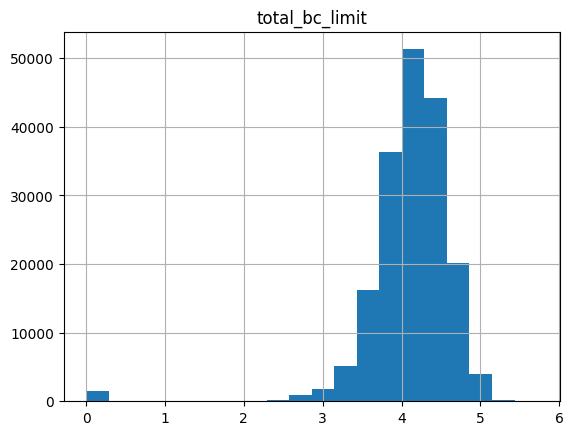

In [47]:
pd.DataFrame(np.log10(training_data['total_bc_limit'] + 1)).hist(bins = 20)

### 2.17 mths_since_last_major_derog

In [48]:
training_data['mths_since_last_major_derog'].describe()

count      32749.0
mean     41.780054
std      20.984599
min            0.0
25%           25.0
50%           41.0
75%           58.0
max          165.0
Name: mths_since_last_major_derog, dtype: Float64

<Axes: >

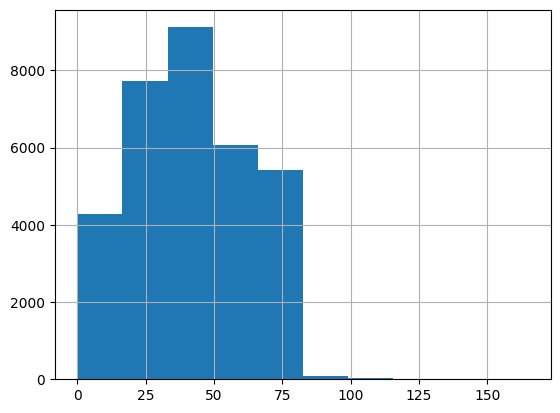

In [49]:
training_data['mths_since_last_major_derog'].hist()

Most data within in 0 to 80 month. However, we find previously that 83% data is missing for this feature

### 2.18 tot_hi_cred_lim

In [50]:
training_data['tot_hi_cred_lim'].describe()

count    181962.000000
mean      20238.384308
std       18941.591779
min           0.000000
25%        7834.720066
50%       14637.479485
75%       26397.825272
max      520643.298200
Name: tot_hi_cred_lim, dtype: float64

<Axes: >

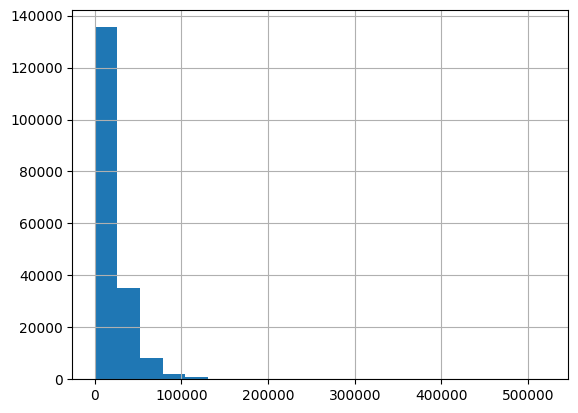

In [51]:
training_data['tot_hi_cred_lim'].hist(bins = 20)

log distribution

array([[<Axes: title={'center': 'tot_hi_cred_lim'}>]], dtype=object)

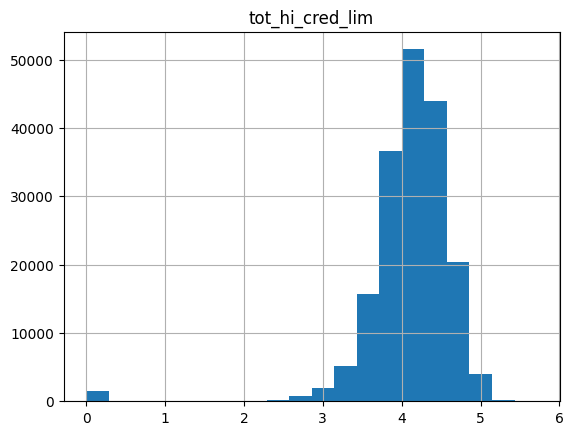

In [52]:
pd.DataFrame(np.log10(training_data['tot_hi_cred_lim'] + 1)).hist(bins = 20)

we see some data in very left side (around 0)

### 2.19 tot_cur_bal

In [54]:
training_data['tot_cur_bal'].describe()

count    1.617160e+05
mean     1.373215e+05
std      1.507358e+05
min      0.000000e+00
25%      2.746575e+04
50%      8.076050e+04
75%      2.082122e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64

show log distribution

array([[<Axes: title={'center': 'tot_cur_bal'}>]], dtype=object)

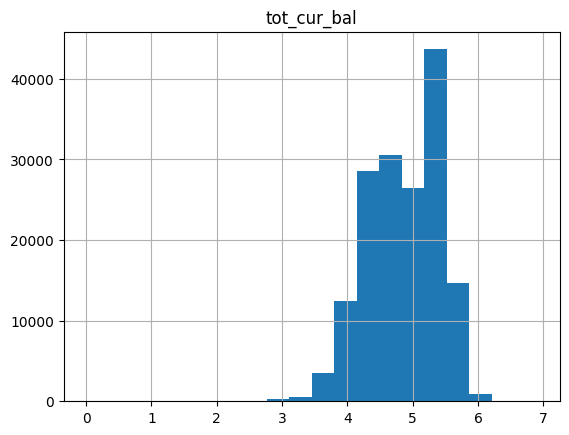

In [55]:
pd.DataFrame(np.log10(training_data['tot_cur_bal'] + 1)).hist(bins = 20)

### 2.20 application_approved_flag

In [56]:
training_data['application_approved_flag'].describe()

count    199121.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: application_approved_flag, dtype: float64

In [57]:
training_data['application_approved_flag'].unique()

array([1])

this dataset all comes from approved loan, this will not be a feature used for model

### 2.21 internal_score

In [58]:
training_data['internal_score'].describe()

count    199121.000000
mean        183.967954
std         104.858324
min          14.000000
25%         105.000000
50%         157.000000
75%         256.000000
max         456.000000
Name: internal_score, dtype: float64

<Axes: >

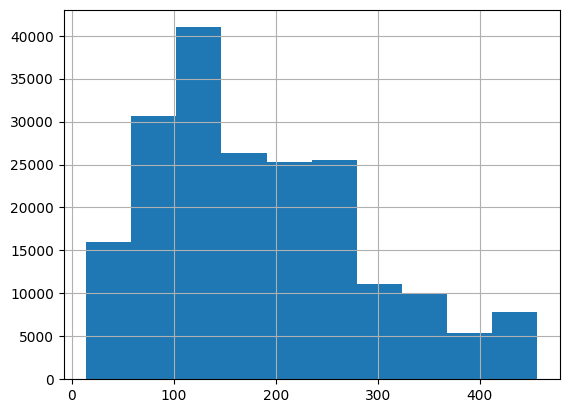

In [59]:
training_data['internal_score'].hist(bins=10)

### 2.22 bad_flag

In [60]:
training_data['bad_flag'].describe()

count    189457.0
mean     0.069293
std      0.253952
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: bad_flag, dtype: Float64

In [61]:
training_data.isna().sum()/training_data.shape[0] * 100

id                              0.000000
member_id                       4.853330
loan_amnt                       0.000000
term                            4.853330
int_rate                        4.853330
emp_length                      8.833825
home_ownership                  4.853330
annual_inc                      4.853330
desc                           58.817001
purpose                         4.853330
percent_bc_gt_75                9.392279
bc_util                         9.435469
dti                             4.853330
inq_last_6mths                  4.853330
mths_since_recent_inq          18.907599
revol_util                      4.917111
total_bc_limit                  8.617373
mths_since_last_major_derog    83.553216
tot_hi_cred_lim                 8.617373
tot_cur_bal                    18.785060
application_approved_flag       0.000000
internal_score                  0.000000
bad_flag                        4.853330
dtype: float64

In [62]:
training_data.groupby(['bad_flag'], dropna=False).count()['id']

bad_flag
0       176329
1        13128
<NA>      9664
Name: id, dtype: Int64

we have some missing data for our target value, this data points should generally be dropped for building model

## 3. Summarize the preporcess/data cleaning code

In [63]:
training_data = pd.read_csv("training_loan_data.csv", 
                            skiprows=1,
                            dtype={'id': 'Int64', 'member_id': 'Int64', 
                                   'inq_last_6mths': 'Int64', 'mths_since_last_major_derog': 'Int64',
                                   'mths_since_recent_inq': 'Int64',
                                   'bad_flag':'Int64'
                                  })
# data cleaning
training_data['int_rate'] = training_data['int_rate'].apply(lambda x:float(x[:-1]) if type(x) == str else np.NaN)
training_data['revol_util'] = training_data['revol_util'].apply(lambda x:float(x[:-1]) if type(x) == str else np.NaN)
training_data['emp_length'] = training_data['emp_length'].apply(lambda x: emp_length_map[x] if type(x)==str else np.NaN)

# drop if targe value bad_flag is missing
# training_data = training_data.dropna(subset=['bad_flag'])

In [64]:
numerical_features = ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'percent_bc_gt_75',
                      'bc_util', 'dti', 'inq_last_6mths', 'mths_since_recent_inq',
                      'revol_util', 'total_bc_limit', 'mths_since_last_major_derog',
                      'tot_hi_cred_lim', 'tot_cur_bal', 'internal_score']
categorical_features = ['term', 'home_ownership', 'purpose', 'bad_flag']
# 'term' only has two 36/60 months for non-missing values, we used as categorical features

some of these concepts are similar and may need more bg info (tot_hi_cred_lim vs total_bc_limit)

In [65]:
training_data.dtypes

id                               Int64
member_id                        Int64
loan_amnt                        int64
term                            object
int_rate                       float64
emp_length                     float64
home_ownership                  object
annual_inc                     float64
desc                            object
purpose                         object
percent_bc_gt_75               float64
bc_util                        float64
dti                            float64
inq_last_6mths                   Int64
mths_since_recent_inq            Int64
revol_util                     float64
total_bc_limit                 float64
mths_since_last_major_derog      Int64
tot_hi_cred_lim                float64
tot_cur_bal                    float64
application_approved_flag        int64
internal_score                   int64
bad_flag                         Int64
dtype: object

I will leave for missing data handling to the model section. Any data/log transformation on features on model section as well.
Categorical features will also be converted later depending on what pacakge we use for modelling.